## **ANN Regression**

## Setting up

In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns

In [2]:
boston_housing = tf.keras.datasets.boston_housing
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

In [3]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


## Data Preparation

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Network Architecture

In [23]:
from keras import layers

model = tf.keras.models.Sequential()
model.add(layers.Dense(100, activation = "relu", input_shape = [13]))
# model.add(layers.BatchNormalization())
model.add(layers.Dense(60, activation = "relu"))
model.add(layers.Dense(1))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 100)               1400      
_________________________________________________________________
dense_10 (Dense)             (None, 60)                6060      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 61        
Total params: 7,521
Trainable params: 7,521
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ["mse"])

In [25]:
history = model.fit(x_train, y_train,
                    epochs = 500,
                    callbacks = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3),
                    validation_data = (x_test, y_test),
                    verbose = 0
                   )

# Visualisation Performance

Text(0, 0.5, 'Loss')

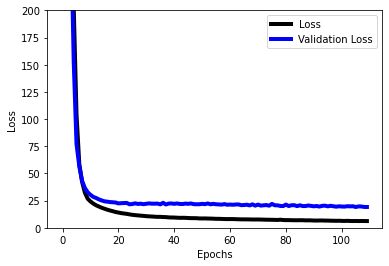

In [26]:
import matplotlib.pyplot as plt

plt.ylim(0, 200)
plt.plot(history.history["loss"], label='Loss', color = "black", linewidth = 4)
plt.plot(history.history['val_loss'], 'b',
         label='Validation Loss', linewidth = 4)
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')